# Homework 10: Inference in SLR and MLR 
***

**Name**: Mohamad Saaty

***

This assignment is due on Canvas by **6:00PM on Friday November 18**. Your solutions to theoretical questions should be done in Markdown directly below the associated question.  Your solutions to computational questions should include any specified Python code and results as well as written commentary on your conclusions.  Remember that you are encouraged to discuss the problems with your classmates, but **you must write all code and solutions on your own**.

**NOTES**: 

- Any relevant data sets should be available in the Homework 01 assignment write-up on Canvas. To make life easier on the grader if they need to run your code, do not change the relative path names here. Instead, move the files around on your computer.
- If you're not familiar with typesetting math directly into Markdown then by all means, do your work on paper first and then typeset it later.  Remember that there is a [reference guide](https://math.meta.stackexchange.com/questions/5020/mathjax-basic-tutorial-and-quick-reference) linked on Canvas on writing math in Markdown. **All** of your written commentary, justifications and mathematical work should be in Markdown.
- Because you can technically evaluate notebook cells is a non-linear order, it's a good idea to do $\color{red}{\text{Kernel}}$ $\color{red}\rightarrow$ $\color{red}{\text{Restart & Run All}}$ as a check before submitting your solutions.  That way if we need to run your code you will know that it will work as expected. 
- It is **bad form** to make your reader interpret numerical output from your code.  If a question asks you to compute some value from the data you should show your code output **AND** $\color{red}{\text{write a summary of the results}}$ in Markdown directly below your code. 
- This probably goes without saying, but... For any question that asks you to calculate something, you **must show all work and justify your answers to receive credit**. Sparse or nonexistent work will receive sparse or nonexistent credit. 

---

Here are some imports for this assignment:

In [118]:
# Per the standard import pandas as 'pd' and numpy as 'np'
import numpy as np 
from scipy import stats
import pandas as pd
import statsmodels.api as sm 
import matplotlib.pyplot as plt 
%matplotlib inline
from sklearn.linear_model import LinearRegression

# Problem 1
***

The business of programming is exploding in growth! As a programmer, it is important to lead a well rounded life and take care of your health. We are going to look at a data set of a sample of programmers, their overall happiness and some possible influences on their happiness.

Load `happiness.csv` as a dataframe called `dfHappy` and take a look at the data.

In [119]:
# Upload here and take a look at some of the data, .head(10) perhaps.
df = pd.read_csv("happiness.csv")
df.head(10)

,Index,happiness,grmsSgr,sunlight,screentime,BMI,ff
0,1,3.427723,52.984804,41.800653,148.656740,22.770203,53
1,2,5.381479,17.620582,83.681961,67.486945,18.965722,52
2,3,4.568705,33.145561,79.765209,83.085792,25.827328,48
3,4,1.560355,68.313223,39.734337,190.733508,19.102485,24
4,5,3.057388,53.587157,51.657807,113.854519,24.970149,2
5,6,0.727221,74.666532,14.594492,254.659872,25.115974,34
6,7,1.590356,62.672605,29.642536,176.756328,25.595235,34
7,8,4.258312,26.837312,79.765056,93.379803,23.654171,57
8,9,5.381398,18.659952,67.390751,52.556721,20.888795,48
9,10,5.890149,21.423596,98.044772,47.082464,27.589727,75


### Data description:

***Index***: This is just a number listing the ID of the programmer.

***happiness***: This is the measured happiness of the programmer on a scale from 0 to 7.

***grmsSgr***: This variable measures the grams of sugar intake per day.

***BMI***: This variable is the body mass index of the individual.

***screentime***: This variable measures the daily minutes of screentime that the programmer put in on a specified day. Some are low due to that day being a research, or field day, and some are high due to that day being a coding day.

***sunlight***: This variable measures the number of minutes taken during the day to be outdoors.

***ff***: This variable measures, on a scale from 0=none to 100=immediate, access to friends and family as a support system with the programmers particular job location. 

### What affects Happiness?

We are attempting to ascertain things that affect happiness. In problem 1 this will be done with Simple Linear Regression.

Determine the affect of each predictor variable in $\color{red}{\textbf{5 steps}}$: 

$\color{red}{\textbf{1]}}$: Make a scatter plot of predictor variable versus response variable. 

$\color{red}{\textbf{2]}}$: Come up with the regression line for the relationship.

Create the same scatterplot (from Step 1) with the line of best-fit imposed on it, $\textbf{AND}$ print the actual equation along with each graph.

That is, fit and $\textbf{print}$ a linear regression model to the data of the form 

$$
Y_i = \alpha + \beta x_i \quad \textrm{for } i=1,2, \ldots, 498 
$$

$\color{red}{\textbf{3]}}$: Find a measure for the goodness of fit of the regression line.

Explain what $R^2$ means in this case.

$\color{red}{\textbf{4]}}$: Create a $99\%$ confidence interval for the slope ($\beta$) of the regression line.

From step 2, notice the $\beta$ for the happiness relationship with sugar.

Explain your results: Is your $\beta$ statistic in the confidence interval? Is 0 included in the interval? 


$\color{red}{\textbf{5]}}$: For the relationship that you think you have discovered, the question is whether its really the case or if the downward/upward trend should be attributed to chance.

Perform a hypothesis test at the $\alpha = 0.01$ significance level to determine if the observed relationship between the predictor and the response is real by testing the hypotheses: 

$$
H_0: \beta = 0 \\
H_1: \beta \neq 0 
$$

$\color{blue}{\text{Explain your results}}$: Is there sufficient evidence to conclude that the observed relationship between the predictor and the response happiness is real? Answer with a p-value argument. Complete each step even if you find no legitimate linear relationship between variables. So, your answer ($\color{blue}{\text{p-value argument}}$) should take into account that we ARE making (without checking) the assumptions below:


### Assumptions

To begin with, we will assume all the $\color{blue}{\text{proper conditions}}$ for doing inference on slope:

-- $\color{blue}{\text{Linear}}$: The relationship between the independent variable and the dependent variable is linear.

-- $\color{blue}{\text{Independence}}$: The noise/errors are independent.

-- $\color{blue}{\text{Normal}}$: The errors are normally distributed.

-- $\color{blue}{\text{Equal Variance}}$: Homoscedastic errors.

-- $\color{blue}{\text{Random}}$: Random errors; unbiased.


### Here are some hints/formulas that may help you:

You may want to use `.max()` and `.min()` in order to find appropriate bounds for each scatterplot.

You may want to do some calculations without using canned functions. Here are some useful formulas:

$\hat{y}=\hat{a}+\hat{b}\cdot x$

$SSE = \sum{(y-\hat{y})^2}$

$\hat{\sigma^2} = \frac{SSE}{n-2}$

$SE_{\beta}=\sqrt{\frac{\hat{\sigma^2}}{\sum{(x-\bar{x})^2}}}$

$t_{\hat{\beta}}=\frac{\hat{\beta}-\beta}{\sqrt{\frac{\hat{\sigma^2}}{\sum{(x-\bar{x})^2}}}}$

$\text{p-value} = 2\cdot \text{CDF}(t_{\hat{\beta}}, n-2)$

$\color{blue}{\text{(25 points) }}$ ***Perform the $\color{red}{\text{5-steps}}$ mentioned above for $\textbf{EACH}$ predictor variable.*** 

***Complete each of the 5 steps mentioned above with a title (such as those below, but replace the question mark of course) and also create any extra needed cells for coding and explanations.***



### Predictor variable = grmsSgr, Step 1.


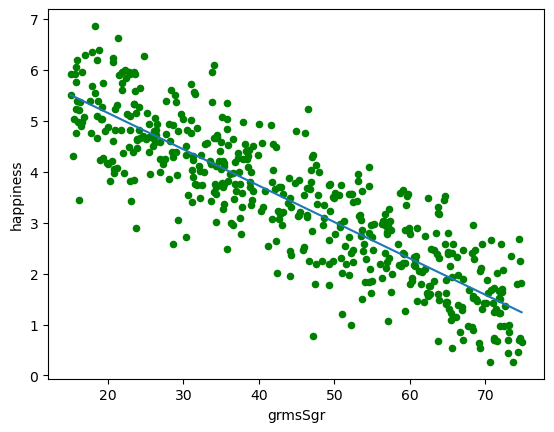

R squared shows that  74.918789072896 % of the points are on the regression line
we should reject the null, it is safe to conclude there is a relationship between the predictor variable and the response variable


In [120]:
#step 2

df.plot.scatter('grmsSgr','happiness',c='green')
reg = stats.linregress(df['grmsSgr'],df['happiness'])
x= np.linspace(df['grmsSgr'].min(),df['grmsSgr'].max(),len(df['grmsSgr']))
y = reg[1] + reg[0]*x
plt.plot(x,y)
plt.show()

#step 3
Rsquared =reg.rvalue**2
print("R squared shows that ",Rsquared*100,"% of the points are on the regression line")

#step 4
alpha = .01
n = len(df['grmsSgr'])
t = stats.t.ppf(1-alpha/2, n-2)
# mse = np.square(np.subtract(df['happiness'],y)).mean()
err = reg[4]
ci = (reg[0]-t*err,reg[0]+t*err)
if(ci[0]<=t<=ci[1]):
    print("The statistic is in the interval")
if(ci[0]<=0<=ci[1]):
    print("0 is in the interval")

#step 5

c = 0
tstat = (reg[0] - c)/err
pval = 2*stats.t.cdf(tstat,n-2)
if(pval>alpha):
    print("we should not reject the null, it is not safe to conclude that there is a relationship between the predictor variable and the response variable")
else:
    print("we should reject the null, it is safe to conclude there is a relationship between the predictor variable and the response variable")
    

### Predictor variable = BMI, Step2.

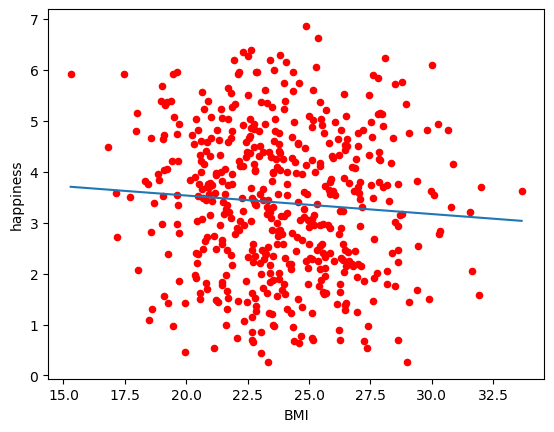

R squared shows that  0.5732414956422796 % of the points are on the regression line
0 is in the interval
we should not reject the null, it is not safe to conclude that there is a relationship between the predictor variable and the response variable


In [121]:

#step 2
df.plot.scatter('BMI','happiness',c='red')
reg = stats.linregress(df['BMI'],df['happiness'])
x= np.linspace(df['BMI'].min(),df['BMI'].max(),len(df['BMI']))
y = reg[1] + reg[0]*x
plt.plot(x,y)
plt.show()
#step 3
Rsquared =reg.rvalue**2
print("R squared shows that ",Rsquared*100,"% of the points are on the regression line")

#step 4
alpha = .01
n = len(df['BMI'])
t = stats.t.ppf(1-alpha/2, n-2)

err = reg[4]
ci = (reg[0]-t*err,reg[0]+t*err)
if(ci[0]<=t<=ci[1]):
    print("The statistic is in the interval")
if(ci[0]<=0<=ci[1]):
    print("0 is in the interval")

#step 5

c = 0
tstat = (reg[0] - c)/err
pval = 2*stats.t.cdf(tstat,n-2)
if(pval>alpha):
    print("we should not reject the null, it is not safe to conclude that there is a relationship between the predictor variable and the response variable")
else:
    print("we should reject the null, it is safe to conclude there is a relationship between the predictor variable and the response variable")
    

### Predictor variable = screentime, Step3.

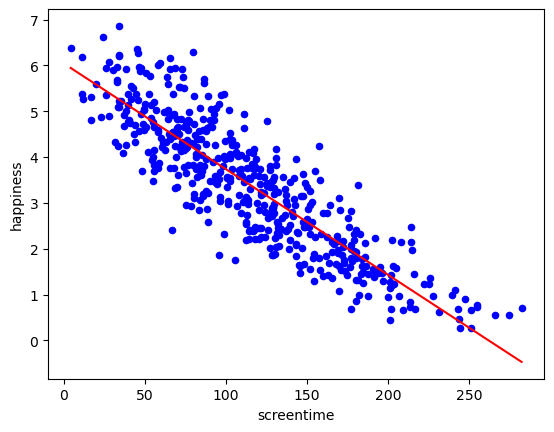

R squared shows that  76.57042983500074 % of the points are on the regression line
we should reject the null, it is safe to conclude there is a relationship between the predictor variable and the response variable


In [122]:

#step 2
df.plot.scatter('screentime','happiness',c='blue')
reg = stats.linregress(df['screentime'],df['happiness'])
x= np.linspace(df['screentime'].min(),df['screentime'].max(),len(df['screentime']))
y = reg[1] + reg[0]*x
plt.plot(x,y,color='red')
plt.show()

#step 3
Rsquared =reg.rvalue**2
print("R squared shows that ",Rsquared*100,"% of the points are on the regression line")

#step 4
alpha = .01
n = len(df['screentime'])
t = stats.t.ppf(1-alpha/2, n-2)
# mse = np.square(np.subtract(df['happiness'],y)).mean()
err = reg[4]
ci = (reg[0]-t*err,reg[0]+t*err)
if(ci[0]<=t<=ci[1]):
    print("The statistic is in the interval")
if(ci[0]<=0<=ci[1]):
    print("0 is in the interval")

#step 5
c = 0
tstat = (reg[0] - c)/err
pval = 2*stats.t.cdf(tstat,n-2)
if(pval>alpha):
    print("we should not reject the null, it is not safe to conclude that there is a relationship between the predictor variable and the response variable")
else:
    print("we should reject the null, it is safe to conclude there is a relationship between the predictor variable and the response variable")
    


### Predictor Variable = sunlight, Step4.

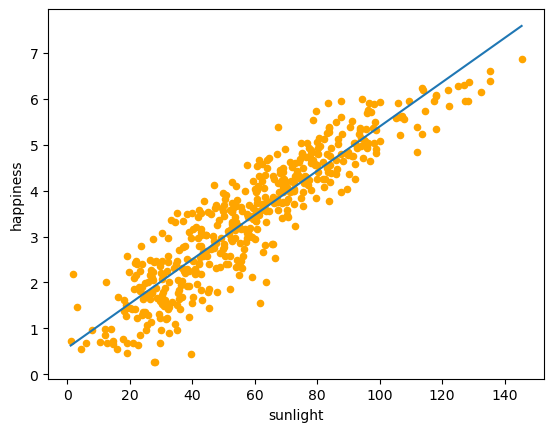

R squared shows that  83.40432434993706 % of the points are on the regression line
we should not reject the null, it is not safe to conclude that there is a relationship between the predictor variable and the response variable


In [123]:
#step 2
df.plot.scatter('sunlight','happiness',c='orange')
reg = stats.linregress(df['sunlight'],df['happiness'])
x= np.linspace(df['sunlight'].min(),df['sunlight'].max(),len(df['sunlight']))
y = reg[1] + reg[0]*x
plt.plot(x,y)
plt.show()

#step 3
Rsquared =reg.rvalue**2
print("R squared shows that ",Rsquared*100,"% of the points are on the regression line")


#step 4
alpha = .01
n = len(df['sunlight'])
t = stats.t.ppf(1-alpha/2, n-2)
# mse = np.square(np.subtract(df['happiness'],y)).mean()
err = reg[4]
ci = (reg[0]-t*err,reg[0]+t*err)
if(ci[0]<=t<=ci[1]):
    print("The statistic is in the interval")
if(ci[0]<=0<=ci[1]):
    print("0 is in the interval")

    
#step 5
c = 0
tstat = (reg[0] - c)/err
pval = 2*stats.t.cdf(tstat,n-2)
if(pval>alpha):
    print("we should not reject the null, it is not safe to conclude that there is a relationship between the predictor variable and the response variable")
else:
    print("we should reject the null, it is safe to conclude there is a relationship between the predictor variable and the response variable")
    

### Predictor variable = ff, Step5.

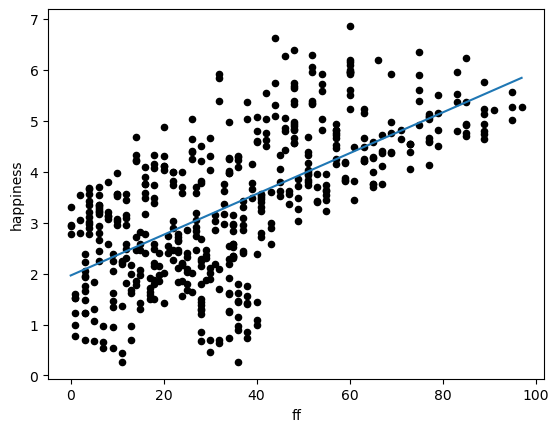

R squared shows that  41.43988161230124 % of the points are on the regression line
we should not reject the null, it is not safe to conclude that there is a relationship between the predictor variable and the response variable


In [124]:
#step 2

df.plot.scatter('ff','happiness',c='black')
reg = stats.linregress(df['ff'],df['happiness'])
x= np.linspace(df['ff'].min(),df['ff'].max(),len(df['ff']))
y = reg[1] + reg[0]*x
plt.plot(x,y)
plt.show()

#step 3
Rsquared =reg.rvalue**2
print("R squared shows that ",Rsquared*100,"% of the points are on the regression line")

#step 4
alpha = .01
n = len(df['ff'])
t = stats.t.ppf(1-alpha/2, n-2)
# mse = np.square(np.subtract(df['happiness'],y)).mean()
err = reg[4]
ci = (reg[0]-t*err,reg[0]+t*err)
if(ci[0]<=t<=ci[1]):
    print("The statistic is in the interval")
if(ci[0]<=0<=ci[1]):
    print("0 is in the interval")

    
#step 5
c = 0
tstat = (reg[0] - c)/err
pval = 2*stats.t.cdf(tstat,n-2)
if(pval>alpha):
    print("we should not reject the null, it is not safe to conclude that there is a relationship between the predictor variable and the response variable")
else:
    print("we should reject the null, it is safe to conclude there is a relationship between the predictor variable and the response variable")
    

# Problem 2

Instead of looking at each individual predictor, fit a multiple linear regression model to the happiness data.

## Part A

***(4 points)*** Use `model = sm.OLS(y, X).fit()` to find the estimated parameters and based on these parameters estimated by the model, replace the unknown $\hat{\beta}_j$ parameters below with the actual values in the model.

$$
\texttt{happiness} = \text{constant} + \beta_{sugar} \times \texttt{grmsSgr} + \beta_{BMI} \times \texttt{BMI} + \beta_{screen} \times \texttt{screentime} + \beta_{sun}\times \texttt{sunlight} + \beta_{ff}\times \texttt{ff}
$$


In [125]:
# Code here:
y = df['happiness']
X = df[['grmsSgr', 'BMI','screentime','sunlight','ff']]
X=sm.add_constant(X)
model = sm.OLS(y, X).fit()
print("happiness =",model.params[0],"+",model.params[1],"X grmsSgr +",model.params[2],
      "X BMI +",model.params[3],"X screentime +",model.params[4], "X sunlight +",model.params[5],
      "X ff")

min(abs(model.params))

happiness = 4.027108054353087 + -0.021067926598462267 X grmsSgr + -0.00761281176875387 X BMI + -0.008401053257578795 X screentime + 0.022160365235547104 X sunlight + 0.00444549556367096 X ff


0.00444549556367096

$\color{red}{\text{Solution for Part A, the model is...:}}$ 
happiness = 4.027108054353087 - 0.021067926598462267 X grmsSgr - 0.00761281176875387 X BMI - 0.008401053257578795 X screentime + 0.022160365235547104 X sunlight + 0.00444549556367096 X ff


### Part B

***(3 points)*** According to a p-value argument, should we discard any predictor variables?

To answer this, run `model.summary()` to check the validity of your $\beta_j$ coefficients, i.e. check to see if a given predictor variable can be eliminated from the model due to its non-relationship with the response variable, and name that variable in your solution.

In [126]:
# Code here:
print(model.summary())



                            OLS Regression Results                            
Dep. Variable:              happiness   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     1310.
Date:                Fri, 18 Nov 2022   Prob (F-statistic):          1.20e-281
Time:                        17:17:14   Log-Likelihood:                -222.53
No. Observations:                 498   AIC:                             457.1
Df Residuals:                     492   BIC:                             482.3
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.0271      0.201     20.044      0.0

$\color{red}{\text{Solution for Part B:}}$
Yes, we should discard the predictor variable BMI since its pvalue is greater than alpha.


### Part C

***(3 points)*** Which two variables have the strongest influence on happiness?

$\color{red}{\text{Solution for Part C:}}$
Sunlight and grams of sugar.

### Part D

***(6 points)*** Find any colinearity issues in this model and create three graphs for the three biggest offending variables to get a visual of the colinearity.

In [127]:
# Code here:
df[['grmsSgr','screentime','BMI','sunlight','ff']].corr()



,grmsSgr,screentime,BMI,sunlight,ff
grmsSgr,1.000000,0.749181,0.070208,-0.788105,-0.556069
screentime,0.749181,1.000000,0.029886,-0.777234,-0.539554
BMI,0.070208,0.029886,1.000000,-0.067274,-0.058958
sunlight,-0.788105,-0.777234,-0.067274,1.000000,0.613576
ff,-0.556069,-0.539554,-0.058958,0.613576,1.000000


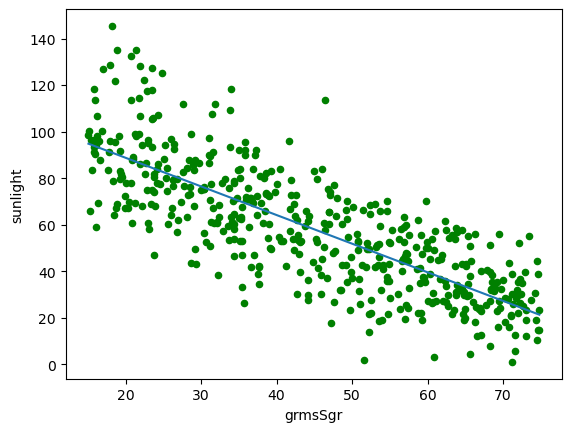

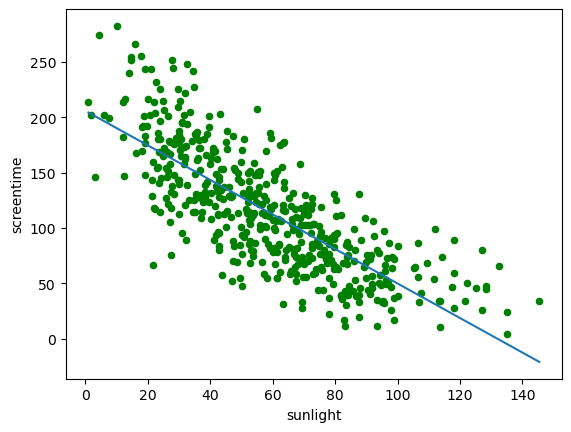

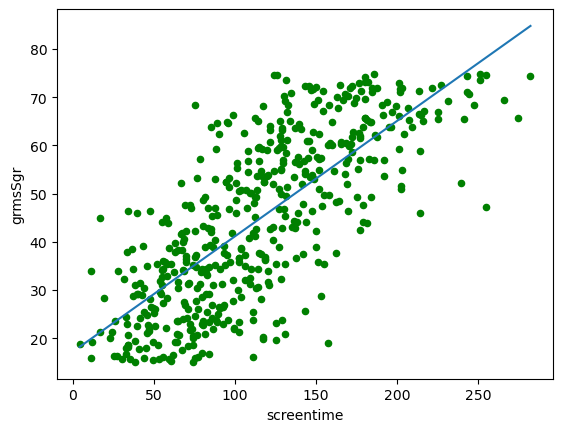

In [128]:
#Code here:
df.plot.scatter('grmsSgr','sunlight',c='green')

reg = stats.linregress(df['grmsSgr'],df['sunlight'])
x= np.linspace(df['grmsSgr'].min(),df['grmsSgr'].max(),len(df['grmsSgr']))
y = reg[1] + reg[0]*x
plt.plot(x,y)
plt.show()

df.plot.scatter('sunlight','screentime',c='green')

reg = stats.linregress(df['sunlight'],df['screentime'])
x= np.linspace(df['sunlight'].min(),df['sunlight'].max(),len(df['sunlight']))
y = reg[1] + reg[0]*x
plt.plot(x,y)
plt.show()

df.plot.scatter('screentime','grmsSgr',c='green')

reg = stats.linregress(df['screentime'],df['grmsSgr'])
x= np.linspace(df['screentime'].min(),df['screentime'].max(),len(df['screentime']))
y = reg[1] + reg[0]*x
plt.plot(x,y)
plt.show()

### Part E

***(4 points)*** Simplify the model by eliminating variables with colinearity. Choose one variable with the strongest affect on happiness and provide an SLR model. What would the linear regression model be?

In [129]:
# Code here:
y = df['happiness']
X = df[['grmsSgr','screentime','sunlight']]
X=sm.add_constant(X)
model = sm.OLS(y, X).fit()
model.summary()
reg = stats.linregress(df['sunlight'],df['happiness'])
reg
print("y=0.5732973547968183 + 0.04827629411906259x")

y=0.5732973547968183 + 0.04827629411906259x


***
# End of assignment
***